# HW5 - AR Model

Please view this in Python Notebook Viewer in case there are rendering problems.

## Part 1

In [9]:
from IPython.display import Image, display, Latex

Model:
$$\begin{eqnarray}
A & \sim & \mathcal{N}(A;0,1.2)\\
R & \sim & \mathcal{IG}(R;0.4,250)\\
x_k|x_{k-1},A,R & \sim & \mathcal{N}(x_k;Ax_{k-1},R)\\
x_0 & = & 1\\
x_1 & = & -6
\end{eqnarray}$$

### 1.1 - Directed Graphical Model

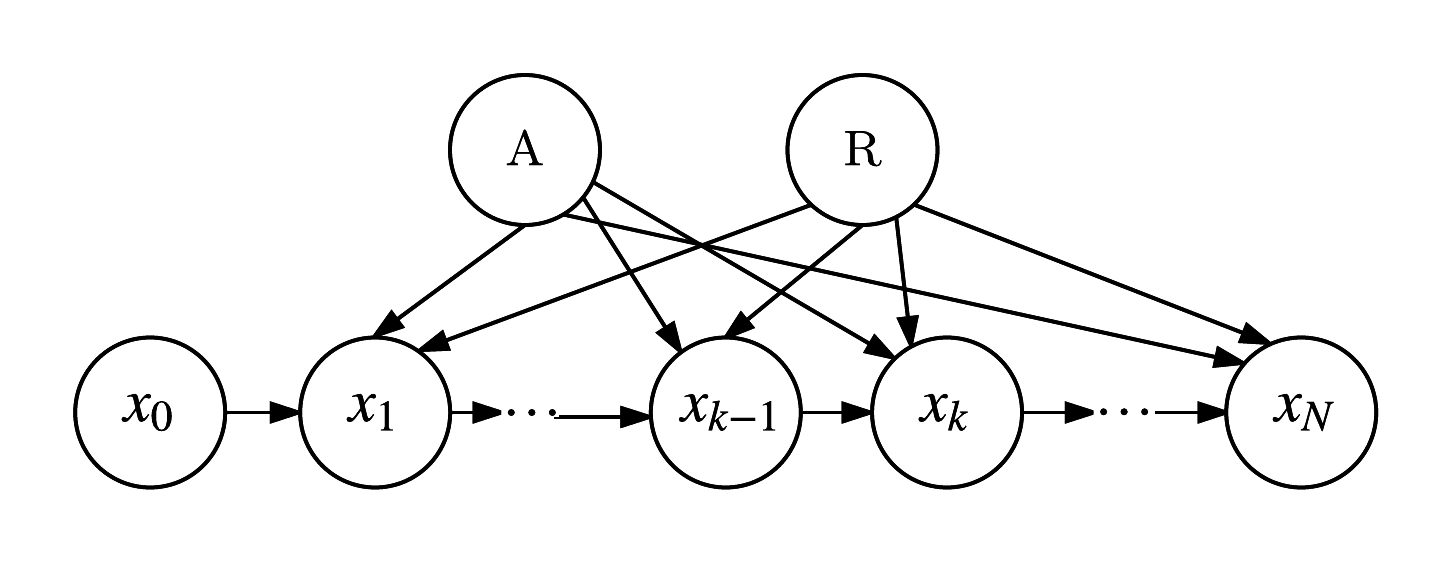

In [24]:
Image("BN.png", width=440)

### 1.2 - Factor Graph

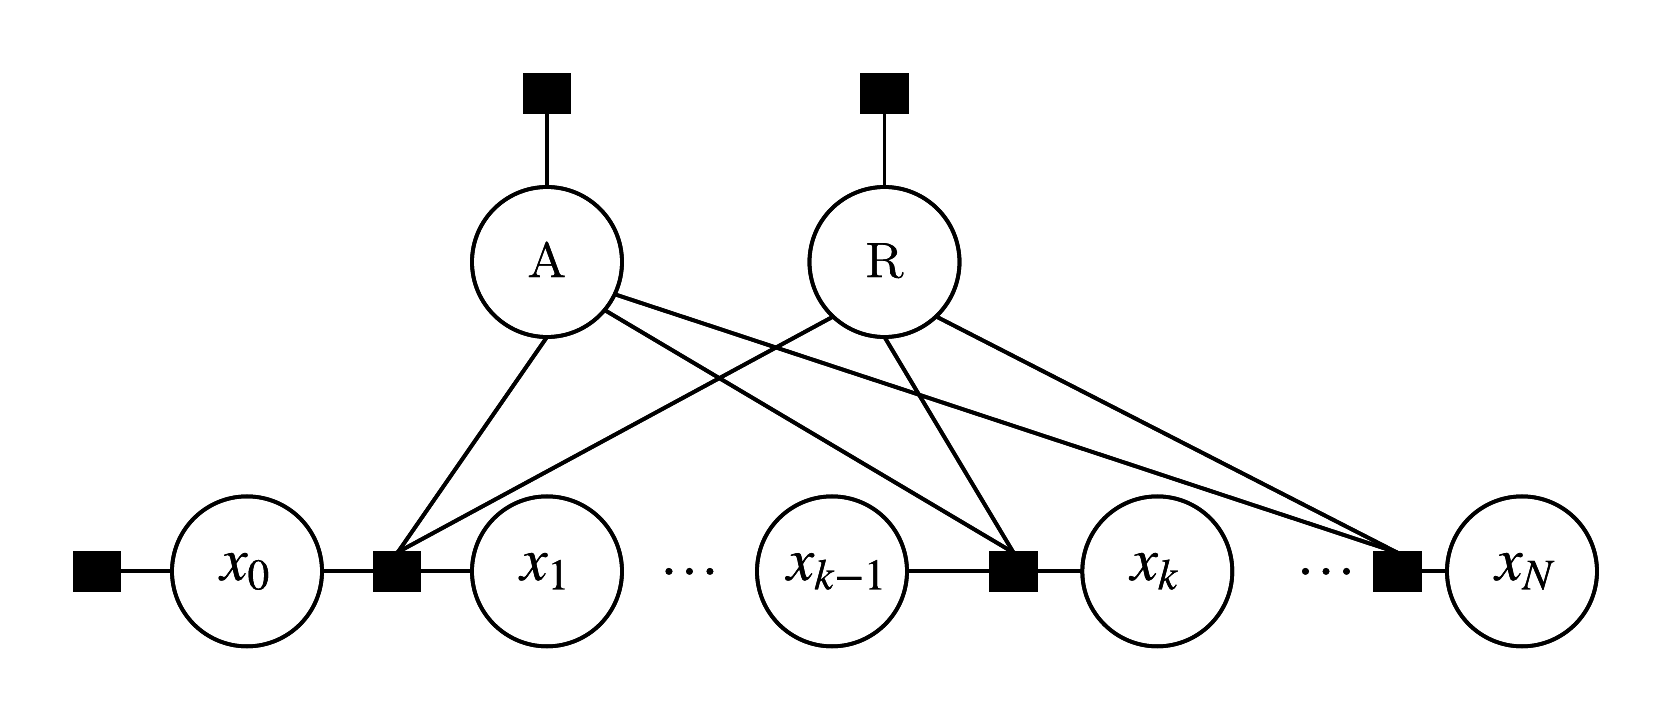

In [27]:
Image("FG.png", width=500)

### 2 - Full Joint Distribution

$p(A,R,X)= p(A)*p(R)*p(x_0)*\prod_{k=1}^{N} p(x_k|x_{k-1},A,R)$

or the log joint distribution is:

$\mathcal{L}(A,R,X)= log(p(A)) + log(p(R)) + log(p(x_o)) + \sum_{k=1}^{N} p(x_k|x_{k-1},A,R) $

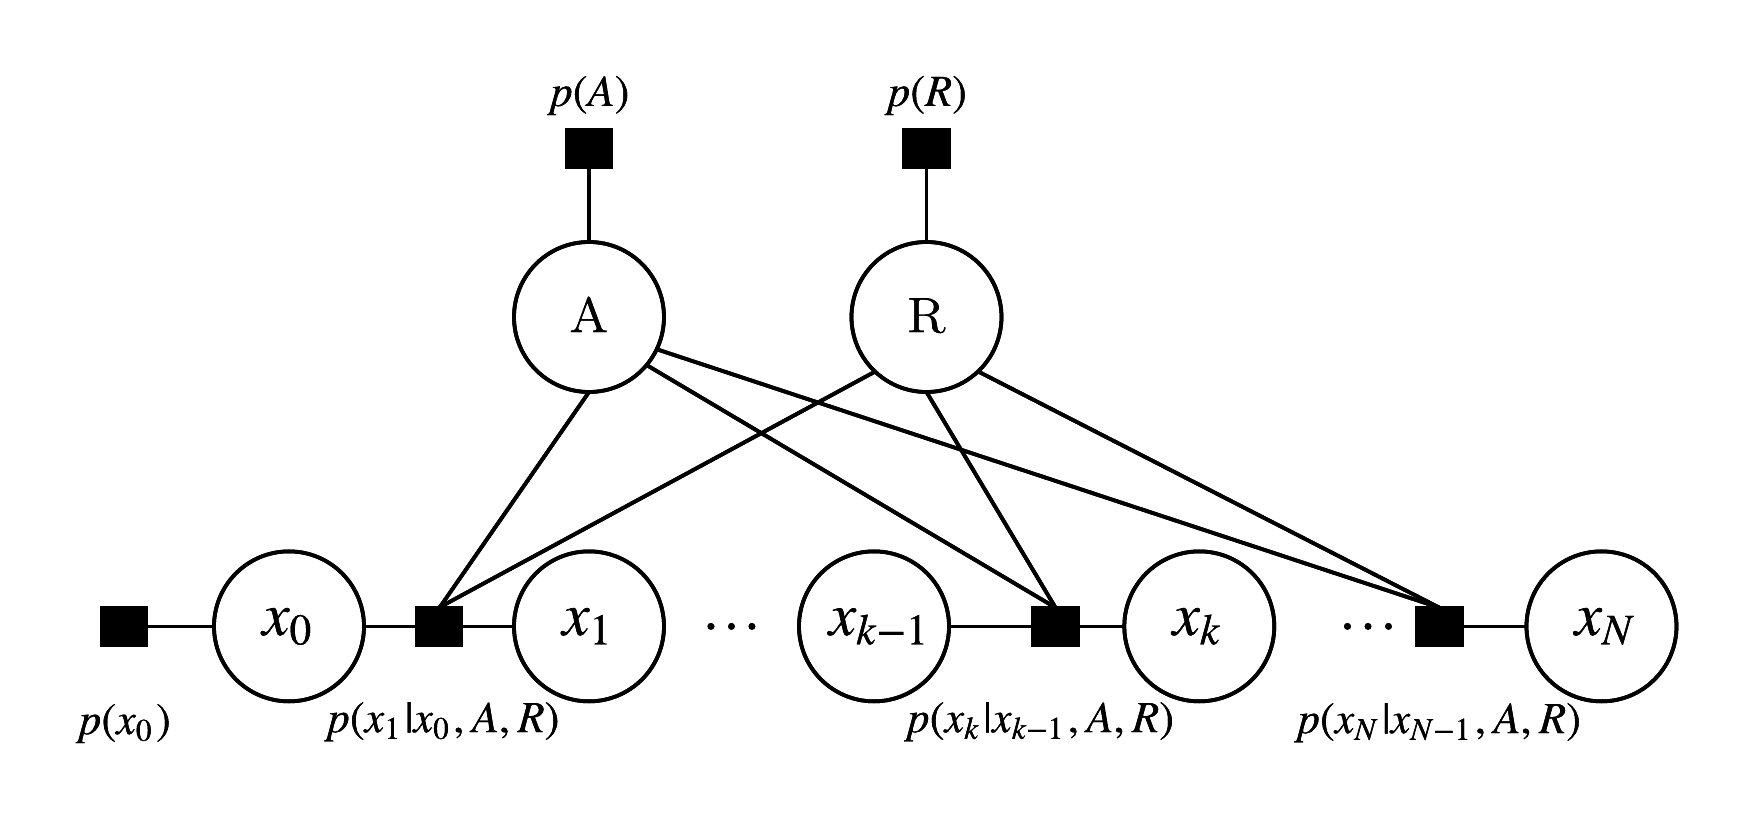

In [28]:
Image("FG1.png", width=600)

### 3 - Full Conditional Distributions

#### Conditional for A
$$\begin{eqnarray}
p(A|R,x_0,x_1) & = & \dfrac{p(A,R,x_0,x_1)}{p(R,x_0,x_1)} \\\\
& = & \dfrac{\int_{x_2}\int_{x_3}\dots \int_{x_N} p(A,R,X) dx_N \dots dx_3 dx_2}{\int_{A}\int_{x_2}\int_{x_3}\dots \int_{x_N} p(A,R,X) dx_N \dots dx_3 dx_2 dA} \\\\
& = & \dfrac{\int_{x_2}\int_{x_3}\dots \int_{x_N} p(A)p(R)p(x_0)\prod_{k=1}^{N} p(x_k|x_{k-1},A,R) dx_N \dots dx_3 dx_2}{\int_{A}\int_{x_2}\int_{x_3}\dots \int_{x_N} p(A)p(R)p(x_0)\prod_{k=1}^{N} p(x_k|x_{k-1},A,R) dx_N \dots dx_3 dx_2 dA} \\\\
& = & \dfrac{p(A)p(x_1|x_0,A,R)}{\int_{A}p(A)p(x_1|x_0,A,R)dA}
\end{eqnarray}$$

where $\int_{A}p(A)p(x_1|x_0,A,R)dA =$  normalization constant = $ C_1 = \int_{A}\mathcal{N}(A;0,1.2)\mathcal{N}(x_1;Ax_0,R)dA$

$$\begin{eqnarray}
p(A|R,x_0,x_1) & \propto & p(A)p(x_1|x_0,A,R) \\\\
& \propto & \mathcal{N}(A;0,1.2)\mathcal{N}(x_1;Ax_0,R)
\end{eqnarray}$$

#### Conditional for R
$$\begin{eqnarray}
p(R|A,x_0,x_1) & = & \dfrac{p(A,R,x_0,x_1)}{p(A,x_0,x_1)} \\\\
& = & \dfrac{\int_{x_2}\int_{x_3}\dots \int_{x_N} p(A,R,X) dx_N \dots dx_3 dx_2}{\int_{R}\int_{x_2}\int_{x_3}\dots \int_{x_N} p(A,R,X) dx_N \dots dx_3 dx_2 dR} \\\\
& = & \dfrac{\int_{x_2}\int_{x_3}\dots \int_{x_N} p(A)p(R)p(x_0)\prod_{k=1}^{N} p(x_k|x_{k-1},A,R) dx_N \dots dx_3 dx_2}{\int_{R}\int_{x_2}\int_{x_3}\dots \int_{x_N} p(A)p(R)p(x_0)\prod_{k=1}^{N} p(x_k|x_{k-1},A,R) dx_N \dots dx_3 dx_2 dR} \\\\
& = & \dfrac{p(R)p(x_1|x_0,A,R)}{\int_{R}p(R)p(x_1|x_0,A,R)dR}
\end{eqnarray}$$

where $\int_{R}p(R)p(x_1|x_0,A,R)dR =$  normalization constant = $ C_2 = \int_{R}\mathcal{IG}(R;0.4,250)\mathcal{N}(x_1;Ax_0,R)dR $

$$\begin{eqnarray}
p(R|A,x_0,x_1) & \propto & p(R)p(x_1|x_0,A,R) \\\\
& \propto & \mathcal{IG}(R;0.4,250)\mathcal{N}(x_1;Ax_0,R)
\end{eqnarray}$$

As a result,
$$\begin{eqnarray}
p(A|R,x_0,x_1) & \propto & \mathcal{N}(A;0,1.2)\mathcal{N}(x_1;Ax_0,R) \\\\
p(R|A,x_0,x_1) & \propto & \mathcal{IG}(R;0.4,250)\mathcal{N}(x_1;Ax_0,R)
\end{eqnarray}$$


### 4 - Joint distribution

$$\begin{eqnarray}
p(A,R,x_0,x_1) & = & \int_{x_2}\int_{x_3}\dots \int_{x_N} p(A,R,X) dx_N \dots dx_3 dx_2 \\\\
& = &\int_{x_2}\int_{x_3}\dots \int_{x_N} p(A)p(R)p(x_0)\prod_{k=1}^{N} p(x_k|x_{k-1},A,R) dx_N \dots dx_3 dx_2 \\\\
& = & p(A)p(R)p(x_0)\int_{x_2}\int_{x_3}\dots \int_{x_N}\prod_{k=1}^{N} p(x_k|x_{k-1},A,R) dx_N \dots dx_3 dx_2 \\\\
& = & p(A)p(R)p(x_0)p(x_1|x_0,A,R)
\end{eqnarray}$$

Therefore,

$$\begin{eqnarray}
p(A,R,x_0=1,x_1=-6) & = & p(A)p(R)p(x_0=1)p(x_1=-6|x_0=1,A,R)
\end{eqnarray}$$

Here, $p(x_0=1)$ is constant = $C_3$.

So,

$$\begin{eqnarray}
p(A,R,x_0,x_1) & \propto & p(A)p(R)p(x_1=-6|x_0=1,A,R) \\\\
& \propto & \mathcal{N}(A;0,1.2)\mathcal{IG}(R;0.4,250)\mathcal{N}(x_1=-6;A,R)
\end{eqnarray}$$



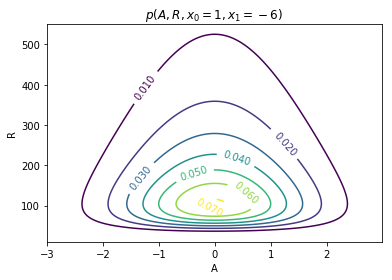

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm,invgamma

Arange = np.arange(-3, 3, 0.01) # range for A
Rrange = np.arange(10, 550, 0.01) # range for R
A,R = np.meshgrid(Arange,Rrange)
P_joint = norm.pdf(A,0,1.2)*invgamma.pdf(R,0.4,loc=0,scale=250)*norm.pdf(-6,A,R) # joint distribution derived above
scale = 10**5 # scale factor for equal-valued points
cs = plt.contour(A,R,P_joint*scale) 
plt.clabel(cs, inline=2)
plt.xlabel('A')
plt.ylabel('R')
plt.title('$p(A,R,x_0=1,x_1=-6)$')
plt.show()

## Part 2

1- Derive and implement an EM algorithm to find the MAP estimate $$R^{*} = argmax_{R}(p(R|x_0, x_1, \theta))$$

As derived in Part 1,
$$\begin{eqnarray}
p(A|R,x_0,x_1) & \propto & \mathcal{N}(A;0,P)\mathcal{N}(x_1;Ax_0,R) \\
& \propto & exp((-0.5)(\dfrac{A^2}{P}+\dfrac{x_1-Ax_0)^2}{R})) \\
& \propto & exp((-0.5)(\dfrac{A^2}{P} +\dfrac{x1^2}{R} + \dfrac{A^2x_0^2}{R} - \dfrac{2Ax_0x_1}{R})) \\ 
& \propto & exp((-0.5)(A^2(\dfrac{1}{P}+\dfrac{x_0^2}{R})-2A\dfrac{x_0x_1}{R}+\dfrac{x_1^2}{R})) \\
& \propto & exp\left(\left(\dfrac{-\frac{1}{P}-\frac{x_0^2}{R}}{2}\right)\left(A-\dfrac{x_0x_1}{R(\frac{1}{P}+\frac{x_0^2}{R})}\right)^2\right) \\
& \propto & exp\left(-\dfrac{1}{2} \dfrac{1}{\left(\frac{1}{P} + \frac{x_0^2}{R}\right)^{-1}} \left(A- \frac{x_0x_1}{R\left(\frac{1}{P} + \frac{x_0^2}{R}\right)}\right)^2\right) \\
& \propto & \mathcal{N}(A;\mu_A,\sigma_A^2)
\end{eqnarray}$$
where 
$$\mu_A= \frac{Px_0x_1}{R_{old}+x_0^2P}$$

$$\sigma_A^2= \frac{PR_{old}}{R_{old}+x_o^2P}$$

and

$$\begin{eqnarray}
B(R|R_{old}) & = & \left<\frac{-1}{2}log(2\pi R)-\frac{1}{2}\frac{x_1^2}{R}+\frac{x_1x_0A}{2}-\frac{A^2x_0^2}{2R}-(\alpha+1)logR-\frac{\beta}{R}\right>_{\mathcal{N}(A;\mu_A, \sigma_A^2)} \\\\
& \propto & \frac{-1}{2}log(2\pi R) - \frac{x_1^2}{2R}+\frac{x_0x_1}{R}<A> -\frac{x_0^2<A^2>}{2R}-(\alpha+1)logR - \frac{\beta}{R}\\\\\\
\frac{\partial B(R|R_{old})}{\partial R} & = & \frac{1}{R}\left(\frac{-1}{2}-\alpha-1\right) + \frac{1}{R^2} \left(\frac{x_1^2}{2}-x_0x_1<A> + \frac{x_0^2}{2}<A^2>+\beta\right) = 0 \\
R^* & = & \frac{\frac{x_1^2}{2}-x_0x_1<A>+\frac{x_0^2}{2}<A^2> + \beta}{\alpha+\frac{3}{2}}
\end{eqnarray}$$

where 
$$\alpha=V$$
$$\beta=V/b$$
$$<A>=\mu_A$$
$$<A^2>=\mu_A^2+\sigma_A^2$$

In [7]:
import numpy as np

# GIVEN VARIABLES
# theta = (V,b,P)
V=0.4
b=100
P=1.2
alpha = V
beta = V/b

# x0, x1
x0=1
x1=-6

R1init= 90*np.random.rand()+10
R1=R1init
R2=0
numIterations = 100

def meanA(R_old):
    return (P*x0*x1)/(R_old+(x0**2)*P)
    
def meanA2(R_old):
    return (meanA(R_old)**2)+((P*R_old)/(R_old+P*(x0**2)))

def findRnew(R_old):
    return (((x1**2)/2)-x0*x1*meanA(R_old) + ((x0**2)/2)*meanA2(R_old) + beta)/(alpha + 1.5)

for i in range (1,numIterations):
    R1_old=R1
    R2_old=R2
    R1=findRnew(R1_old)
    R2=findRnew(R2_old)

print("R1*=",R1, " for initial R=", R1init)
print("R2*=",R2,  " for initial R=0")



R1*= 7.245899080340407  for initial R= 96.40883348892366
R2*= 0.0029309180959289226  for initial R=0


2- Derive and implement an EM algorithm to find the MAP estimate $$A^{*} = argmax_{A}(p(A|x_0, x_1, \theta))$$

As derived in Part 1,
$$\begin{eqnarray}
p(R|A,x_0,x_1) & \propto & \mathcal{IG}(R;V,V/b)\mathcal{N}(x_1;Ax_0,R) \\
log(p(R|A,x_0,x_1)) & \propto & -\frac{1}{2}logR - (\alpha+1)logR-\frac{(x_1-Ax_0)^2}{2R}-\frac{\beta}{R} \\
& \propto & - \left(\alpha+\frac{3}{2}\right)logR - \left(\frac{1}{2}(x_1-Ax_0)^2+\beta\right) \frac{1}{R} \\
& \propto & log\left(\mathcal{IG}\left(R; \alpha+\frac{1}{2}, \frac{1}{2}(x_1-Ax_0)^2+\beta\right)\right) \\
p(R|A,x_0,x_1) & \propto & \mathcal{IG}\left(R; \alpha+\frac{1}{2}, \frac{1}{2}(x_1-Ax_0)^2+\beta\right)
\end{eqnarray}$$

and
$$\begin{eqnarray}
B(A|A_{old}) & = & \left<\frac{x_0x_1A}{R}-\frac{x_0^2A^2}{2R} - \frac{A^2}{2P}\right>_{\mathcal{IG}\left(R; \alpha+\frac{1}{2}, \frac{1}{2}(x_1-Ax_0)^2+\beta\right)} \\\\
& \propto & x_0x_1A\left<\frac{1}{R}\right> - \frac{x_0^2A^2}{2}\left<\frac{1}{R}\right> - \frac{A^2}{2P}
\\\\
\dfrac{\partial B(A|A_{old})}{\partial A} & = & x_0x_1\left<\frac{1}{R}\right> - x_0^2A\left<\frac{1}{R}\right> - \frac{A}{P} = 0 \\\\
A^* & = & \dfrac{x_0x_1\left<\frac{1}{R}\right>}{\frac{1}{P}+x_0^2\left<\frac{1}{R}\right>}
\end{eqnarray}$$
where
$$\alpha=V$$
$$\beta=V/b$$
$$\left<\frac{1}{R}\right>=\dfrac{\alpha+\frac{1}{2}}{\beta+\frac{(x_1-A_{old}x_0)^2}{2}}$$

In [5]:
import numpy as np

# GIVEN VARIABLES
# theta = (V,b,P)
V=0.4
b=100
P=1.2
alpha = V
beta = V/b

# x0, x1
x0=1
x1=-6

A1init= 90*np.random.rand() + 10
A1=A1init
A2=-6
numIterations = 100

def meanoneoverR(A_old):
    return (alpha+1/2)/(beta+((1/2)*(x1-A_old*x0)**2))
    
def findAnew(A_old):
    mean1overR = meanoneoverR(A_old)
    return (x0*x1*mean1overR)/((1/P)+(x0**2)*mean1overR)

for i in range (1,numIterations):
    A1_old=A1
    A2_old=A2
    A1=findAnew(A1_old)
    A2=findAnew(A2_old)

print("A1*=",A1, "for initial A=", A1init)
print("A2*=",A2, "for initial A=-6")



A1*= -0.3845558972418148 for initial A= 45.354367408696994
A2*= -5.976313139142639 for initial A=-6


3- Derive and implement an ICM (Iterative conditional modes) algorithm to find
$$(R^*, A^*) = argmax_{R,A}p(A, R|x0, x1, \theta)$$

This time, we subsequently determine A and R in each iteration and directly use the calculated value instead of the expected values used in the previous EM algorithms. Therefore, there will be a modification in findRnew and findAnew functions.

In [6]:
import numpy as np

# GIVEN VARIABLES
# theta = (V,b,P)
V=0.4
b=100
P=1.2
alpha = V
beta = V/b

# x0, x1
x0=1
x1=-6

Rinit= 20*np.random.rand()-10 # initialize R to a number between -10,10
R=Rinit
Ainit= 20*np.random.rand()-10 # initialize A to a number between -10,10
A=Ainit

numIterations = 100 # 100 is enough for convergence

def findRnew(A): # use A and A^2 instead of <A> and <A^2>
    return (((x1**2)/2)-x0*x1*A + ((x0**2)/2)*(A**2) + beta)/(alpha + 1.5)

def findAnew(R): # use 1/R instead of <1/R>
    return (x0*x1*(1/R))/((1/P)+(x0**2)*(1/R))

for i in range (1,numIterations):
    # Calculate A and R subsequently
    A_old=A
    A=findAnew(R)
    R_old=R
    R=findRnew(A)
    
print("(A*,R*)=(", A,",",R,") \nfor initial values Ainit=", Ainit, "Rinit=",Rinit )

(A*,R*)=( -0.8925375416681927 , 6.8668875692812605 ) 
for initial values Ainit= -9.284424427117559 Rinit= -4.030630394580483


Due to lack of time, I could not complete question 4. 

Below is the VB algorithm from the slides. I have to derive an expression for lowerbound depending on a,b,Sig and mu so that I can calculate it in each iteration and add it to lowerbounds array. Finding the max lowerbound and plotting the results is then trivial.

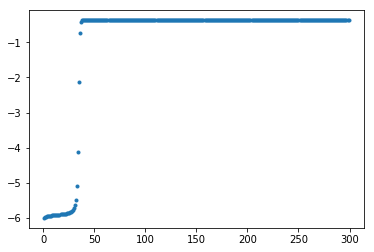

In [2]:
import matplotlib.pyplot as plt
import numpy as np

V = 0.4
b = 100
beta = V/b
P = 1.2
x_0 = 1
x_1 = -6
numIterations = 300; # Number of iterations
E_A = -6
E_A2 = E_A**2
E_invR = 1/0.00001 # Initial Sufficient stats

iters = np.arange(1,numIterations,1)
lowerbounds=[]

for t in range (1,numIterations):    
    # Update q(A)
    Sig = 1/(1/P + (x_0**2)*E_invR);
    mu = Sig*x_0*x_1*E_invR
    E_A = mu      
    E_A2 = mu**2 + Sig
    
    # Update q(R)
    a = V+0.5;
    b = 0.5*((x_1**2) - 2*x_1*x_0*E_A + (x_0**2)*E_A2) + beta
    E_invR = a/b
    # calculate B
    lb=E_A # dummy value for lowerbound
    lowerbounds.append(lb)

plt.plot(iters,lowerbounds, '.')
plt.show()
